Importing pandas, numpy, seaborn python libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.core.display import HTML

__Logistic Regression__ is a Machine Learning supervised classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.).

In [2]:
Image(url= "https://raw.githubusercontent.com/vrc-vinodh/mock-data-generation-hr-analytics/master/attachements/logistic-regression.gif",width=200)

the above equation of logistic regression, if the value of P is more than 0.5 is classified as 1(yes, success, etc), else it is classified as 0 (no, failure, etc.).

In [3]:
#importing dataset which has been converted to dummies for doing predictive analytics
traindata = pd.read_csv("hr-total-cat-unbalanced.csv",index_col=0)

Separting target variable Y (promoted or not promoted) from the features in the dataset as X.

In [4]:
Y = traindata['is_promoted'].values
X_traindata = traindata.drop('is_promoted', axis=1)
X = X_traindata.values

Split data set into training and test sets

In [5]:
#splitting the data into training data and test data, here test_size = 0.25 indicates 25% is assigned to test data.
#random_state variable is used so that every time same rows are selected and splitted as test data. 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

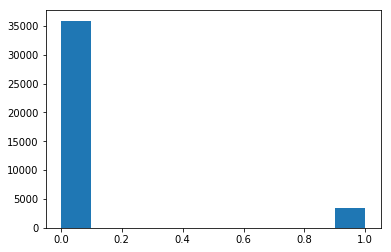

In [6]:
plt.hist(Y_train);
plt.show()

Here dataset predictor variable is unbalanced size, we need to assign class weight so that minority samples get more penality weightage if they are predicted incorrect compared to majority sample.

In [7]:
#importing class_weight function to assign majority and minority class weight
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_class_weight
class_weights = class_weight.compute_class_weight('balanced',np.unique(Y_train),Y_train)
class_weightsl = class_weights.tolist()
class_weightsl

[0.5476144027646174, 5.75051214515657]

In [8]:
# Importing LogisticRegression model from sklearn package
from sklearn.linear_model import LogisticRegression

# Create instance (i.e. object) of LogisticRegression
lrmodel = LogisticRegression(solver='lbfgs',max_iter=5000,class_weight={0:0.5476144027646174, 1:5.75051214515657})

In [9]:
#fit the LogisticRegression model for the train data set
lrmodel.fit(X_train, Y_train)

LogisticRegression(C=1.0,
          class_weight={0: 0.5476144027646174, 1: 5.75051214515657},
          dual=False, fit_intercept=True, intercept_scaling=1,
          max_iter=5000, multi_class='warn', n_jobs=None, penalty='l2',
          random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=False)

In [10]:
#performing cross validation on the dataset by specifying cv = 10.
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(lrmodel, X_train, Y_train, cv=10)
print(cv_results)

[0.77283134 0.76545408 0.75826972 0.76692112 0.77760814 0.77582697
 0.77048346 0.77933316 0.77093408 0.76380758]


In [11]:
#mean value of cross validation for 10 iterations
np.mean(cv_results)

0.7701469666515177

__Summary of logistic regression coefficients__

In [12]:
import statsmodels.api as sm
X2 = sm.add_constant(X_traindata)
logit_model=sm.Logit(Y,X2)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.198006
         Iterations: 35
                              Results: Logit
Model:                 Logit               Pseudo R-squared:    0.329     
Dependent Variable:    y                   AIC:                 20880.5893
Date:                  2020-02-24 13:54    BIC:                 21456.9211
No. Observations:      52399               Log-Likelihood:      -10375.   
Df Model:              64                  LL-Null:             -15456.   
Df Residuals:          52334               LLR p-value:         0.0000    
Converged:             0.0000              Scale:               1.0000    
No. Iterations:        35.0000                                            
--------------------------------------------------------------------------
                    Coef.    Std.Err.    z     P>|z|    [0.025     0.975] 
--------------------------------------------------------------------------
const              -30.2934    0.5142 -58.9166 0.0000   -31.3012

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [13]:
#predicting predictor for train data
y_pred_train = lrmodel.predict(X_train)

#predicting predictor for test data
y_pred_test = lrmodel.predict(X_test)

In [14]:
from IPython.display import Image
from IPython.core.display import HTML
Image(url= "https://raw.githubusercontent.com/vrc-vinodh/HR-Analytics-Practice-Dataset/master/attachements/Confusion-matrix.png",width=600)

In [15]:
#confusion matrix for train data
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train, y_pred_train)

array([[27471,  8411],
       [  615,  2802]], dtype=int64)

In [16]:
#confusion matrix for test data
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred_test)

array([[9217, 2754],
       [ 196,  933]], dtype=int64)

In [17]:
#importing classification matrix and accuracy score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

classification report for train data

In [18]:
Image(url= "https://raw.githubusercontent.com/vrc-vinodh/HR-Analytics-Practice-Dataset/master/attachements/precision-recall-f1score.png",width=500)

In [19]:
print(classification_report(Y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.98      0.77      0.86     35882
           1       0.25      0.82      0.38      3417

   micro avg       0.77      0.77      0.77     39299
   macro avg       0.61      0.79      0.62     39299
weighted avg       0.91      0.77      0.82     39299



In [20]:
print(classification_report(Y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.98      0.77      0.86     11971
           1       0.25      0.83      0.39      1129

   micro avg       0.77      0.77      0.77     13100
   macro avg       0.62      0.80      0.62     13100
weighted avg       0.92      0.77      0.82     13100



In [21]:
print("Accuracy score for train data:",accuracy_score(Y_train, y_pred_train))
print("Accuracy score for test data:",accuracy_score(Y_test, y_pred_test))

Accuracy score for train data: 0.7703249446550803
Accuracy score for test data: 0.7748091603053435


1.High precision means not many people who don't deserve promotion didn't get promoted.

2.High recall means predicted most people who are likely to get promoted.

In [22]:
#importing roc_auc_score and roc_curve functions from sklearn library
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

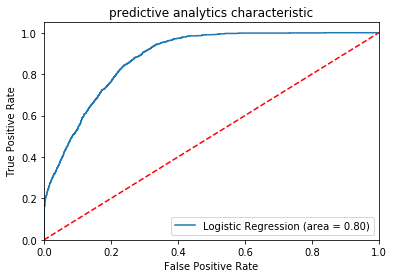

In [23]:
logit_roc_auc = roc_auc_score(Y_test, lrmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, lrmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('predictive analytics characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Finding out predictor for Test Data

In [25]:
X_testdata = pd.read_csv("test-hr-total-cat1.csv",index_col=0)

In [26]:
X_testdata1 = X_testdata.values

In [27]:
lrmodel.fit(X, Y)

LogisticRegression(C=1.0,
          class_weight={0: 0.5476144027646174, 1: 5.75051214515657},
          dual=False, fit_intercept=True, intercept_scaling=1,
          max_iter=5000, multi_class='warn', n_jobs=None, penalty='l2',
          random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=False)

In [28]:
final_prediction_unknown = lrmodel.predict(X_testdata1)
final_prediction_unknown[0:100]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [29]:
final_prediction_unknown = final_prediction_unknown.tolist()
X_testdata['prediction']=final_prediction_unknown
final = X_testdata['prediction']

In [30]:
final[0:25]

employee_id
8724     1
74430    0
72255    0
38562    0
64486    0
46232    0
54542    0
67269    0
66174    0
76303    1
60245    1
42639    0
30963    0
54055    0
42996    1
12737    0
27561    0
26622    1
31582    0
29793    0
72735    0
5677     0
60889    0
51498    1
8566     0
Name: prediction, dtype: int64

In [31]:
final.to_csv('test-data-prediction-logistic-regression-model.csv')